# Droughts!

### <font color=red> Please use the template below to answer the _complete workshop questions from the course notes_.</font>

### Your name:  Frank D'Agostino

In [1]:
# Load libraries and data:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import solve_ivp

# load the data from a pickle file:
with open('./droughts_variables.pickle', 'rb') as file:
    while 1:
        try:
            d = pickle.load(file)
        except (EOFError):
            break
            # print information about each extracted variable:
        for key in list(d.keys()):
            print("extracting pickled variable: name=", key,  "; size=", d[key].shape)
            #print("type=",type(d[key]))
        globals().update(d)

extracting pickled variable: name= PDSI_timeseries ; size= (2, 2006)
extracting pickled variable: name= all_individual_tree_records_widths ; size= (146,)
extracting pickled variable: name= all_individual_tree_records_years ; size= (146,)
extracting pickled variable: name= sahel_gfdl_evaporation ; size= (2, 237)
extracting pickled variable: name= sahel_gfdl_moisture ; size= (2, 237)
extracting pickled variable: name= sahel_gfdl_precipitation ; size= (2, 237)
extracting pickled variable: name= sahel_miroc_evaporation ; size= (2, 247)
extracting pickled variable: name= sahel_miroc_moisture ; size= (2, 247)
extracting pickled variable: name= sahel_miroc_precipitation ; size= (2, 247)
extracting pickled variable: name= sw_gfdl_evaporation ; size= (2, 237)
extracting pickled variable: name= sw_gfdl_moisture ; size= (2, 237)
extracting pickled variable: name= sw_gfdl_precipitation ; size= (2, 237)
extracting pickled variable: name= sw_miroc_evaporation ; size= (2, 247)
extracting pickled vari

## 1) Plot past and future of Sahel/ south-west US droughts for "GFDL" and "MIROC" climate models:

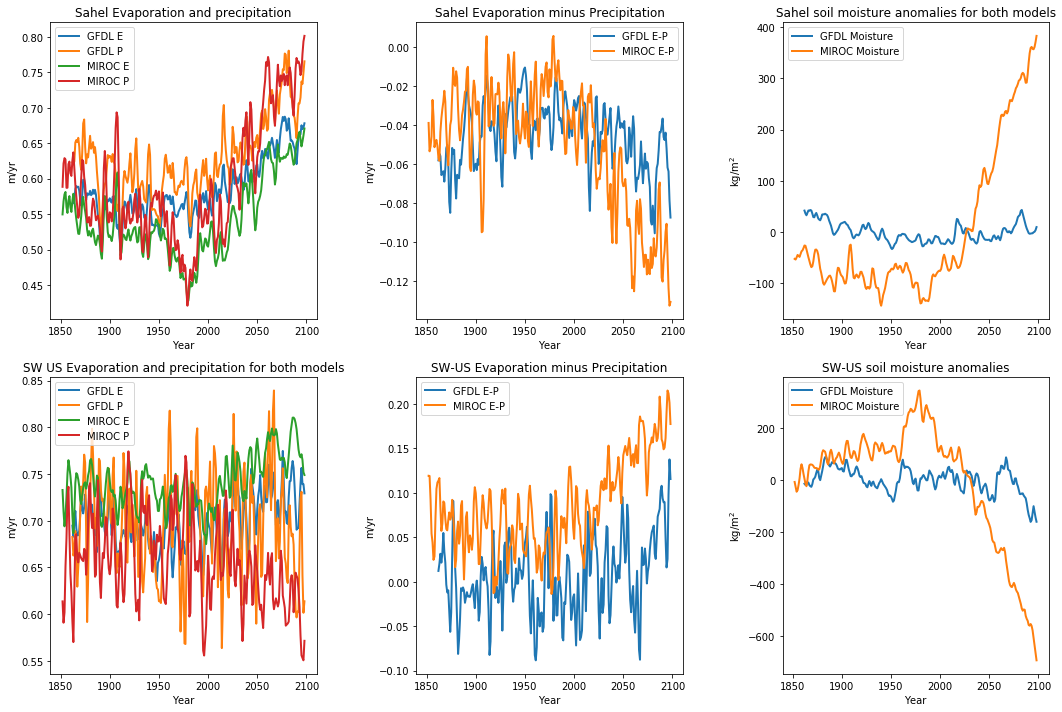

In [2]:
# plot:
fig1 = plt.figure(1,figsize=(15,10)); plt.clf()
plt.subplot(2,3,1)
plt.ylabel("m/yr")
plt.xlabel("Year")
plt.title("Sahel Evaporation and precipitation")
plt.plot(sahel_gfdl_evaporation[0,:], sahel_gfdl_evaporation[1,:], lw=2, label="GFDL E")
plt.plot(sahel_gfdl_precipitation[0,:], sahel_gfdl_precipitation[1,:], lw=2, label="GFDL P")
plt.plot(sahel_miroc_evaporation[0,:], sahel_miroc_evaporation[1,:], lw=2, label="MIROC E")
plt.plot(sahel_miroc_precipitation[0,:], sahel_miroc_precipitation[1,:], lw=2, label="MIROC P")
plt.legend()


plt.subplot(2,3,2)
plt.ylabel("m/yr")
plt.xlabel("Year")
plt.title("Sahel Evaporation minus Precipitation")
plt.plot(sahel_gfdl_evaporation[0,:], sahel_gfdl_evaporation[1,:]-sahel_gfdl_precipitation[1,:], lw=2, label="GFDL E-P")
plt.plot(sahel_miroc_evaporation[0,:], sahel_miroc_evaporation[1,:]-sahel_miroc_precipitation[1,:], lw=2, label="MIROC E-P")
plt.legend()


plt.subplot(2,3,3)
plt.ylabel("kg/m$^2$")
plt.xlabel("Year")
plt.title("Sahel soil moisture anomalies for both models")
evapsahel = sahel_gfdl_moisture[1,:] - np.mean(sahel_gfdl_moisture[1,:])
evapmiroc = sahel_miroc_moisture[1,:] - np.mean(sahel_miroc_moisture[1,:])
plt.plot(sahel_gfdl_moisture[0,:],evapsahel, lw=2, label="GFDL Moisture")
plt.plot(sahel_miroc_moisture[0,:], evapmiroc, lw=2, label="MIROC Moisture")
plt.legend()


plt.subplot(2,3,4)
plt.ylabel("m/yr")
plt.xlabel("Year")
plt.title("SW US Evaporation and precipitation for both models")
plt.plot(sw_gfdl_evaporation[0,:], sw_gfdl_evaporation[1,:], lw=2, label="GFDL E")
plt.plot(sw_gfdl_precipitation[0,:], sw_gfdl_precipitation[1,:], lw=2, label="GFDL P")
plt.plot(sw_miroc_evaporation[0,:], sw_miroc_evaporation[1,:], lw=2, label="MIROC E")
plt.plot(sw_miroc_precipitation[0,:], sw_miroc_precipitation[1,:], lw=2, label="MIROC P")
plt.legend()


plt.subplot(2,3,5)
plt.ylabel("m/yr")
plt.xlabel("Year")
plt.title("SW-US Evaporation minus Precipitation")
plt.plot(sw_gfdl_evaporation[0,:], sw_gfdl_evaporation[1,:]-sw_gfdl_precipitation[1,:], lw=2, label="GFDL E-P")
plt.plot(sw_miroc_evaporation[0,:], sw_miroc_evaporation[1,:]-sw_miroc_precipitation[1,:], lw=2, label="MIROC E-P")
plt.legend()


plt.subplot(2,3,6)
plt.ylabel("kg/m$^2$")
plt.xlabel("Year")
plt.title("SW-US soil moisture anomalies")
evapsw = sw_gfdl_moisture[1,:] - np.mean(sw_gfdl_moisture[1,:])
evapswmiroc = sw_miroc_moisture[1,:] - np.mean(sw_miroc_moisture[1,:])
plt.plot(sahel_gfdl_moisture[0,:],evapsw, lw=2, label="GFDL Moisture")
plt.plot(sahel_miroc_moisture[0,:], evapswmiroc, lw=2, label="MIROC Moisture")
plt.legend()
plt.tight_layout()
plt.show()

In the first graph, it seems both models say that precipitation and evaporation will increase in Sahel. In the second, we see that both models suggest that the difference between precipitation and evaporation will decrease. However, in the soil moisture graph (third one top row) drastically increases in the MIROC model, and stays relatively the same in the GFDL model. The models diverge greatly. For the SW US, MIROC suggests that evaporation will increase and precipitation will decrease. The GFDL seems to show that evaporation will increase and precipitation will decrease. In the second graph, it seems that both models show that the difference between evaporation and precipitation will increase, with a slight gap between the models. This gap is exaggerated in soil moisture, where the MIROC model suggests that soil moisture will drastically decrease, while GFDL suggests that soil moisture will stay relatively stable.

## 2) Long-term south-west US drought record and non-parametric statistics:

### Explanation of the input tree ring data:

Note that all_individual_tree_records_widths/ all_individual_tree_records_widths_years are both lists. Each element of the list is an individual tree record/ time axis. The above "size" of these variables, is the number of tree records in each list. Each record can be accessed and printed, for example using:

In [3]:
# print for example record #3:
print(" data=",all_individual_tree_records_widths[3])
print(" years=",all_individual_tree_records_years[3])

print("\n some of the data=",all_individual_tree_records_widths[3][3:8])
print(" and the corresponding years=",all_individual_tree_records_years[3][3:8])

 data= [192, 220, 164, 156, 125, 103, 110, 91, 62, 103, 106, 155, 150, 164, 167, 170, 174, 218, 171, 180, 181, 205, 232, 173, 252, 177, 150, 173, 136, 128, 133, 100, 82, 102, 96, 99, 116, 117, 203, 273, 208, 277, 227, 163, 155, 240, 203, 190, 226, 294, 256, 169, 210, 270, 260, 255, 242, 244, 209, 152, 144, 136, 156, 127, 117, 129, 106, 59, 94, 97, 103, 154, 196, 194, 188, 184, 196, 179, 160, 158, 142, 103, 67, 58, 16, 71, 54, 57, 89, 84, 96, 124, 68, 40, 16, 62, 48, 93, 119, 156, 126, 78, 131, 111, 86, 69, 146, 115, 135, 171, 207, 165, 196, 233, 114, 164, 275, 80, 160, 144, 52, 146]
 years= [1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,

## 2a) Plot the 2000 year long time series of PDSI from North American Drought Atlas

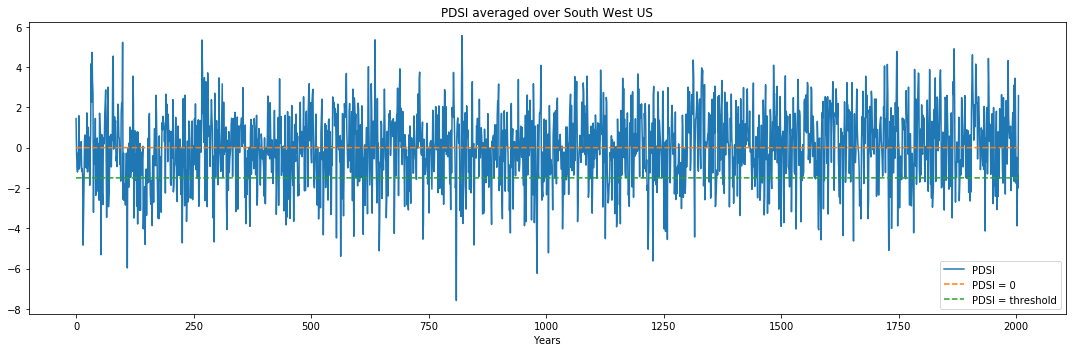

In [4]:
pdsi=PDSI_timeseries[1,:]
years=PDSI_timeseries[0,:]

pdsi_threshold=-1.5 # a drought is defined as being less than this value

# plot the pdsi time series:
# --------------------------
plt.figure(figsize=(15,5))
# plot the PDSI time series
plt.plot(years, pdsi, label="PDSI")
# add a thin dash line at pdsi=0:
plt.plot(years, pdsi*0, linestyle = '--', label="PDSI = 0")
# add a thin dash line at pdsi=threshold value used to define droughts:
plt.plot(years, pdsi*0 + pdsi_threshold, linestyle = '--', label="PDSI = threshold")
plt.legend()
plt.xlabel("Years")
plt.ylabel("")
plt.title("PDSI averaged over South West US")
plt.tight_layout()

## 2b) Analyze using non-parametric statistics

[ 0. -0. -0. -0. -0. -0.  0. -0. -0.  0.  0.  0. -0. -0. -0.  1.  1.  1.
  0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.  1.]
6.0


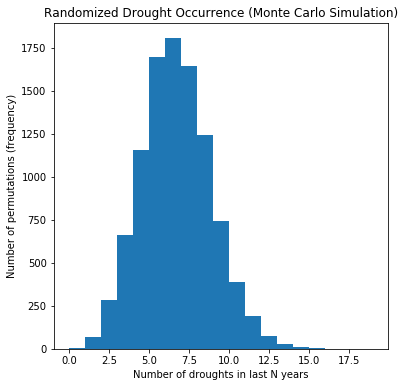

In [5]:
# calculate number of drought years in the last N years of data:
N_years=30
counter=pdsi*0.0
#print(pdsi[0:20])
counter[pdsi<=pdsi_threshold]=1.0
# XX print counter to understand what it represents, and then
print(counter[0:N_years])
# XX calculate and print the total number of 
# drought events in the last N_years, using the above variable counter
droughts_total = np.sum(counter[-N_years:])
print(droughts_total)

# scramble years in the data to see how many droughts randomly 
# occur in the lasts 50 years and compare to the actual data
N_permutations=10000
num_droughts_in_last_N_years=np.zeros(N_permutations)
for i in range(0,N_permutations):
    counter=pdsi*0.0
    pdsi_randomized=np.random.permutation(pdsi)
    # count number of droughts in the last N_years:
    counter[pdsi_randomized<=pdsi_threshold]=1.0
    num_droughts_in_last_N_years[i]=np.sum(counter[-N_years:])

# plot probability distribution fun ction of number of drought events in last N years:
plt.figure(figsize=(6,6))
plt.hist(num_droughts_in_last_N_years,bins=list(range(0,20)));
plt.xlabel("Number of droughts in last N years")
plt.ylabel("Number of permutations (frequency)")
plt.title("Randomized Drought Occurrence (Monte Carlo Simulation)");

## 3) Getting to know tree-ring data:

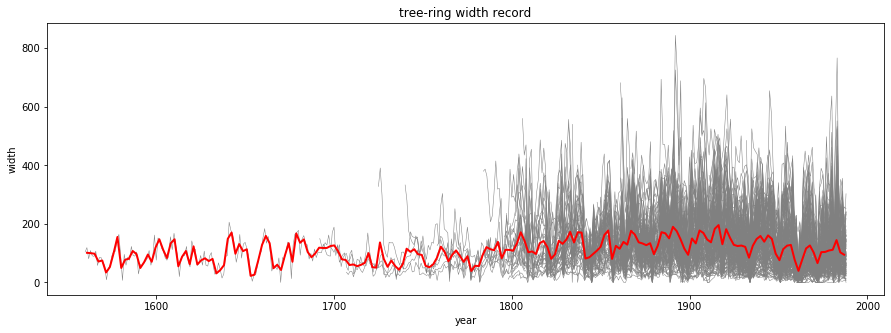

In [6]:
# plot the individual tree-ring records in gray:
plt.figure(figsize=(15,5))
# supplement the following line with a for loop to plot all records:

for i in range(len(all_individual_tree_records_years)):
    plt.plot(all_individual_tree_records_years[i][:]
                ,all_individual_tree_records_widths[i][:]\
            ,linewidth=0.5,color="grey")
    plt.xlabel("year")
    plt.ylabel("width")
    plt.title("tree-ring width record")

# calculate the bin-averaged record by average over decadal-bins
# first combine all tree record into a single one:
years =[]; widths=[];
for sublist in all_individual_tree_records_years:
    for item in sublist:
        years.append(item)
for sublist in all_individual_tree_records_widths:
    for item in sublist:
        widths.append(item)

# now calculate bin-average:
bin_means, bin_edges, binnumber \
      = stats.binned_statistic(years,widths, statistic='mean',bins=200)
years_axis=(bin_edges[0:-1]+bin_edges[1:])*0.5

# now plot over the individual tree records:
plt.plot(years_axis, bin_means,'r-',linewidth=2,label="bin-average");

The noisiness of the graph depicts that data is much more uncertain. This implies that different methods of accurately determining tree ring width can be variable. Furthermore, I'm sure there was less of a sample size throughout the earlier than the 1800s as trees that live hundreds of years are much rarer, especially after the mass deforestation that occurred in the 1800s. The scatter is much more prominent throughout the early 1800s to 1900s, and seems to be reduced closer to the 2000s. Furthermore, trees are not all uniform, and therefore the variability could come from using trees in different areas to gather the data.

## 4) Bucket model for soil moisture:

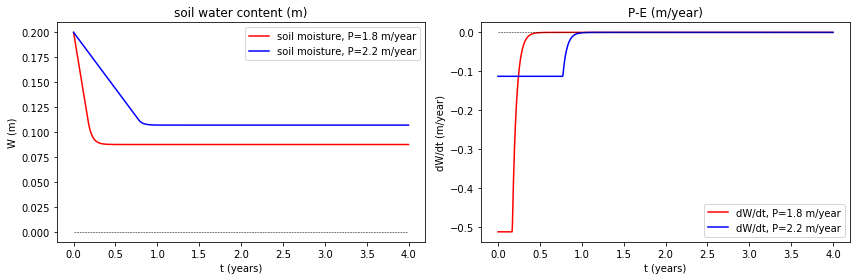

In [7]:
########################################################################
# functions
########################################################################

# saturation specific humidity:
def q_sat(T,P):
    # saturation specific humidity (gr water vapor per gram moist air):
    # inputs:
    # T: temperature, in K
    # P: pressure, in mb

    R_v = 461 # Gas constant for moist air = 461 J/(kg*K)
    R_d = 287 # Gas constant 287 J K^-1 kg^-1
    TT = T-273.15 # Kelvin to Celsius
    # Saturation water vapor pressure (mb) from Emanuel 4.4.14 p 116-117: 
    ew = 6.112*np.exp((17.67 * TT) / (TT + 243.5))
    # saturation mixing ratio (gr water vapor per gram dry air):
    rw = (R_d / R_v) * ew / (P - ew)
    # saturation specific humidity (gr water vapor per gram moist air):
    qw = rw / (1 + rw)
    return qw


# Right hand side of bucket model ODE to be integrated:
def right_hand_side(t, W, Precip):
    # t: time
    # W: soil moisture
    E0=rho_air*C_D*V*q_sat(T,1000)*RH/rho_water
    if W >= W_FC and Precip-E0 > 0.0:
        dW_dt=0
    elif W >= W_k:
        dW_dt=Precip-E0
    else:
        dW_dt=Precip - E0*(W/W_k)
    return dW_dt


# ODE solver:
def solve_ODE(Precip):
    """
    Solve the ODE for soil moisture econtent
    """
    tspan=(times_save[0],times_save[-1])
    sol = solve_ivp(fun=lambda t,W: right_hand_side(t,W,Precip) \
                ,vectorized=False,y0=W0,t_span=tspan,t_eval=times_save,rtol=1.e-6)
    time_array=sol.t[:]
    W_array=sol.y[0,:]
    
    # calculate the RHS of the differencial equation for all times, for plotting:
    dW_dt_array=0.0*W_array
    for i in range(0,len(W_array)):
        t=1.0*time_array[i]
        W=1.0*W_array[i]
        dW_dt_array[i]=right_hand_side(t, W, Precip)

    return W_array, time_array/YEAR, dW_dt_array


########################################################################
# set parameters
########################################################################

YEAR = 31536000 # a year in seconds
DAY=86400
YEARS_TO_RUN = 4
# time step specifying resolutio for plotting:
dt=YEARS_TO_RUN*YEAR/1000
times_save=np.arange(0,YEARS_TO_RUN*YEAR,dt)
C_D=0.5e-3
RH=0.6
rho_air=1.225 # kg/m^3
rho_water=1000 # kg/m^3
V=10 # wind velocity m/s
W_FC=0.15
W_k=0.75*W_FC
T=25+273.15 # temperature in Kelvin

# initial values for soil moisture:
W0 = np.array([0.2]) # m, sec solve_ivp really wants this to be a numpy array


########################################################################
# Main program
########################################################################

# solve ODE:
Precip1=1.8/YEAR # in units of m/s
W_array1, time_array1, dW_dt_array1 = solve_ODE(Precip1)
Precip2=2.2/YEAR # in units of m/s
W_array2, time_array2, dW_dt_array2 = solve_ODE(Precip2)

# plot soil water content:
plt.figure(1,figsize=(12,4));
plt.clf()
plt.subplot(1,2,1)
plt.plot(time_array1, W_array1, "-", color='r', label="soil moisture, P="+repr(Precip1*YEAR)+" m/year")
plt.plot(time_array2, W_array2, "-", color='b', label="soil moisture, P="+repr(Precip2*YEAR)+" m/year")
plt.plot(time_array1, 0*W_array1, "--", color='black', lw=0.5)
plt.title('soil water content (m)')
plt.ylabel('W (m)')
plt.xlabel('t (years)')
plt.legend(loc='upper right')


# plot P-E, rhs of soil moisture equation:
plt.subplot(1,2,2)
plt.plot(time_array1, dW_dt_array1*YEAR, "-", color='r', label="dW/dt, P="+repr(Precip1*YEAR)+" m/year")
plt.plot(time_array2, dW_dt_array2*YEAR, "-", color='b', label="dW/dt, P="+repr(Precip2*YEAR)+" m/year")
plt.plot(time_array1, 0*W_array1, "--", color='black', lw=0.5)
plt.title('P-E (m/year)')
plt.ylabel('dW/dt (m/year)')
plt.xlabel('t (years)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Discussion: The soil does not completely dry when the precipitation rate is decreased from the value that led to the first equilibrium because of the water table decreasing, meaning that evaporation decreases due to the resistance of the larger soil layer. The stages seen in the time series have to do with the water table level lowering as a result of the evaporation, which means that it levels out over time once it reaches equilibrium. For less precipitation, it reaches equilibrium sooner because the water table can lower much more quickly to reach equilibrium. 